### Import Librairies

In [2170]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

### Loading the dataset

In [2042]:
train_dataset=pd.read_csv('train.csv')
test_dataset=pd.read_csv('test.csv')
print('Training dataset count\n',training_dataset.count())
print('Test dataset count\n',training_dataset.count())


Training dataset count
 Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64
Test dataset count
 Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64


In [2044]:
# Checking Null Values for the train dataset
(train_dataset.isnull().sum() /train_dataset.shape[0] *
 100).sort_values(ascending=False).round(2).astype(str) + ' %'


PoolQC         99.52 %
MiscFeature     96.3 %
Alley          93.77 %
Fence          80.75 %
MasVnrType     59.73 %
                ...   
ExterQual        0.0 %
Exterior2nd      0.0 %
Exterior1st      0.0 %
RoofMatl         0.0 %
SalePrice        0.0 %
Length: 81, dtype: object

In [2046]:
# Checking Null Values for the test dataset
(test_dataset.isnull().sum() /test_dataset.shape[0] *
 100).sort_values(ascending=False).round(2).astype(str) + ' %'

PoolQC           99.79 %
MiscFeature       96.5 %
Alley            92.67 %
Fence            80.12 %
MasVnrType       61.27 %
                  ...   
Electrical         0.0 %
1stFlrSF           0.0 %
2ndFlrSF           0.0 %
LowQualFinSF       0.0 %
SaleCondition      0.0 %
Length: 80, dtype: object

In [2048]:
#replace NaN values with 0 for the test set
test_dataset['BsmtFullBath']=test_dataset['BsmtFullBath'].fillna(0)
test_dataset['BsmtHalfBath']=test_dataset['BsmtHalfBath'].fillna(0)

### Exploring the relationship between the  the price of house based on their square footage and the number of bedrooms and bathrooms

In [2120]:
#Extracting the independent and dependent variables columns from the training set
train_dataset['Bathroom']=train_dataset['BsmtFullBath']+train_dataset['BsmtHalfBath']+train_dataset['FullBath']+train_dataset['HalfBath']
# Sample data (assuming you have your data loaded into a DataFrame)
data = {
    'BedroomNb': train_dataset['BedroomAbvGr'],
    'BathroomNb': train_dataset['Bathroom'],
    'SquareFg':train_dataset['LotArea'],
    'Saleprice':train_dataset['SalePrice']
}
# Create a DataFrame from the dictionary
df = pd.DataFrame(data)  

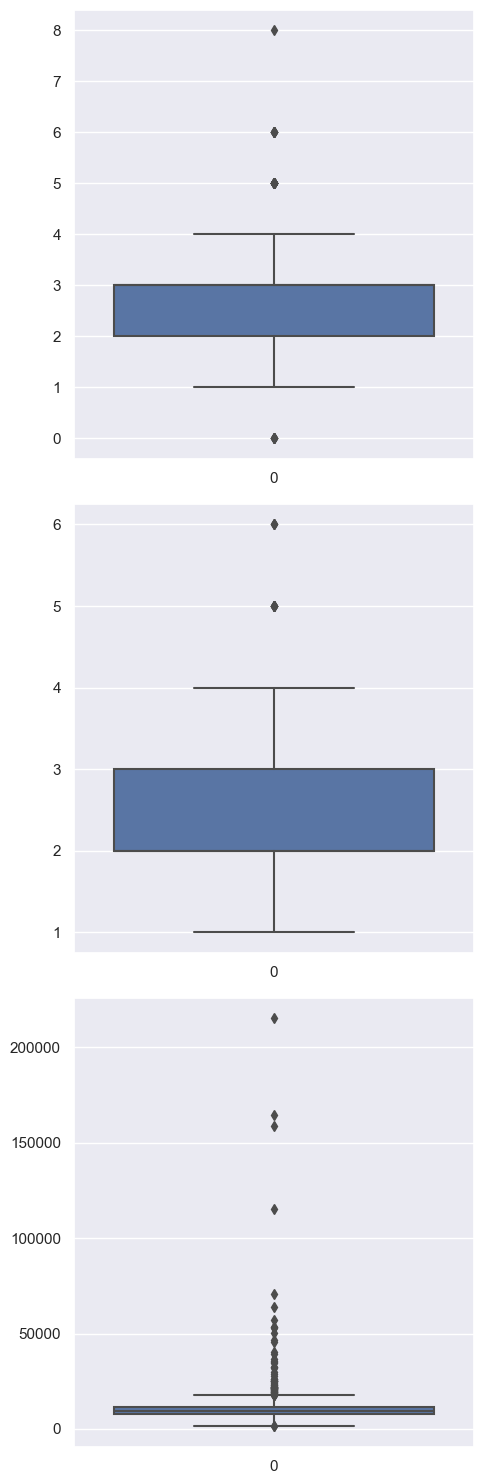

In [2124]:
#checking for outliers
fig, axs = plt.subplots(3, figsize = (5,15))
plt1 = sns.boxplot(df['BedroomNb'], ax = axs[0])
plt2 = sns.boxplot(df['BathroomNb'], ax = axs[1])
plt3 = sns.boxplot(df['SquareFg'], ax = axs[2])
plt.tight_layout()

C:\Users\nermi\AppData\Local\Temp\ipykernel_9812\3099313100.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Saleprice_in_hundreds']);
C:\Users\nermi\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


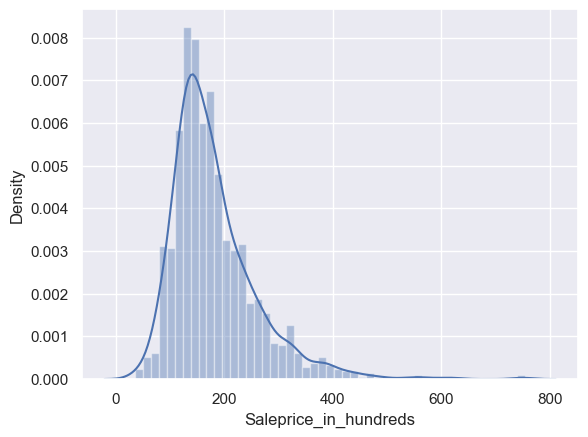

In [2084]:
#Distribution of the target variable
sns.distplot(df['Saleprice_in_hundreds']);

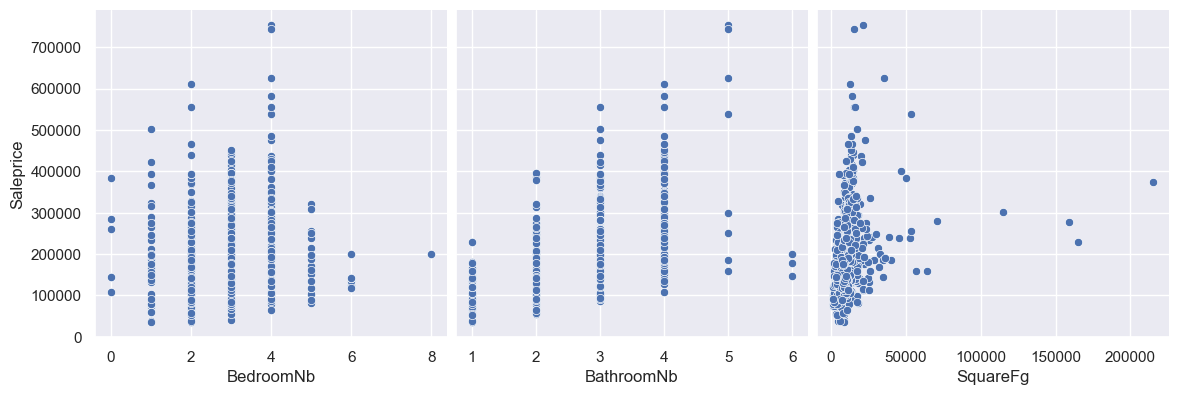

In [2126]:
#Relationship of Sales Price with other variables
sns.pairplot(df, x_vars=['BedroomNb', 'BathroomNb','SquareFg'], y_vars='Saleprice', height=4, aspect=1, kind='scatter')
plt.show()

In [2128]:
print(df.describe())

         BedroomNb   BathroomNb       SquareFg      Saleprice
count  1460.000000  1460.000000    1460.000000    1460.000000
mean      2.866438     2.430822   10516.828082  180921.195890
std       0.815778     0.922647    9981.264932   79442.502883
min       0.000000     1.000000    1300.000000   34900.000000
25%       2.000000     2.000000    7553.500000  129975.000000
50%       3.000000     2.000000    9478.500000  163000.000000
75%       3.000000     3.000000   11601.500000  214000.000000
max       8.000000     6.000000  215245.000000  755000.000000


C:\Users\nermi\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nermi\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nermi\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nermi\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

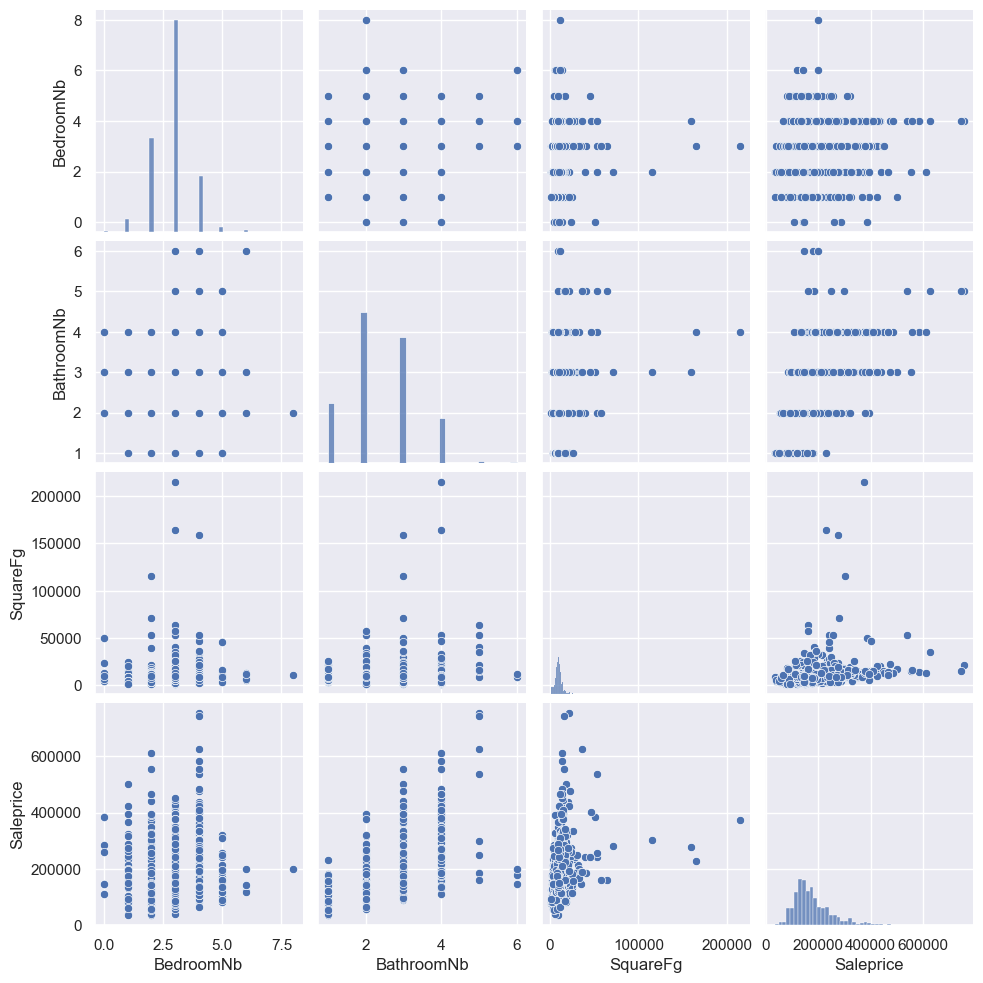

In [2130]:
sns.pairplot(df)
plt.show()

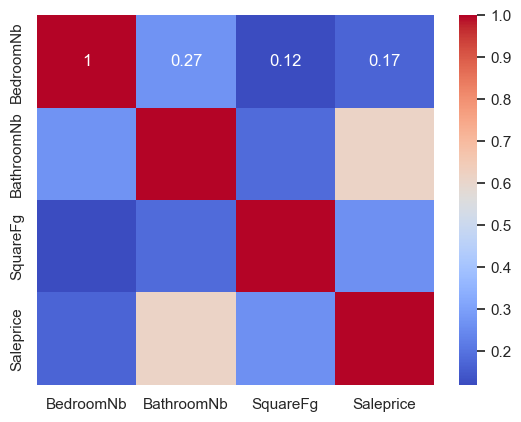

In [2131]:
# Create the correlation matrix and represent it as a heatmap.
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [2134]:
#Extracting the independent and dependent variables columns from the training set
train_dataset['Bathroom']=train_dataset['BsmtFullBath']+train_dataset['BsmtHalfBath']+train_dataset['FullBath']+train_dataset['HalfBath']
train_data = {
    'BedroomNb': train_dataset['BedroomAbvGr'],
    'BathroomNb': train_dataset['Bathroom'],
    'SquareFg':train_dataset['LotArea']
}
# Create a training DataFrame from the dictionary
x_train= pd.DataFrame(train_data)  
y_train=train_dataset['SalePrice']

In [2146]:
#Extracting the independent and dependent variables columns from the test set
test_dataset['Bathroom']=test_dataset['BsmtFullBath']+test_dataset['BsmtHalfBath']+test_dataset['FullBath']+test_dataset['HalfBath']
test_data = {
    'BedroomNb': test_dataset['BedroomAbvGr'],
    'BathroomNb': test_dataset['Bathroom'],
    'SquareFg':test_dataset['LotArea']
}
# Create a DataFrame from the dictionary
x_test = pd.DataFrame(test_data) 
y_test=sample_submission['SalePrice']

In [2148]:
reg_model = linear_model.LinearRegression()

In [2150]:
reg_model = LinearRegression().fit(x_train, y_train)

In [2152]:
#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)
# pair the feature names with the coefficients
list(zip(x_train, reg_model.coef_))


Intercept:  47216.372461355786


[('BedroomNb', -726.2539203998313),
 ('BathroomNb', 50466.0363499113),
 ('SquareFg', 1.2468244375637385)]

In [2154]:
#Predicting the Test and Train set result 
y_pred=reg_model.predict(x_test)
x_pred=reg_model.predict(x_train) 

In [2156]:
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [110720.49458383 163758.1276507  213679.3017214  ... 170179.91823085
 158987.77735258 208438.89861032]


In [2158]:
#the predictions confidence interval 
prediction_train.conf_int()

array([[250918.4053824 , 263956.43981199],
       [204628.49815082, 212181.97055014],
       [254572.34929148, 267284.71275324],
       ...,
       [150411.99664392, 162622.43544407],
       [154149.4562222 , 163473.20453818],
       [205066.30335169, 212584.52502019]])

In [2160]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
0,169277.052498,110720.494584
1,187758.393989,163758.127651
2,183583.683570,213679.301721
3,179317.477511,208876.533988
4,150730.079977,152936.293630
...,...,...
1454,167081.220949,148383.535511
1455,164788.778231,148331.168885
1456,219222.423400,170179.918231
1457,184924.279659,158987.777353


In [2162]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 38059.81770203212
Mean Square Error: 2187213754.2428126
Root Mean Square Error: 46767.65713869803


In [2164]:
model=smf.ols(formula='y_train~BedroomNb+BathroomNb+SquareFg',data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     322.7
Date:                Thu, 11 Jul 2024   Prob (F-statistic):          1.29e-160
Time:                        22:47:28   Log-Likelihood:                -18172.
No. Observations:                1460   AIC:                         3.635e+04
Df Residuals:                    1456   BIC:                         3.637e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.722e+04   6567.626      7.189      0.0

In [2166]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

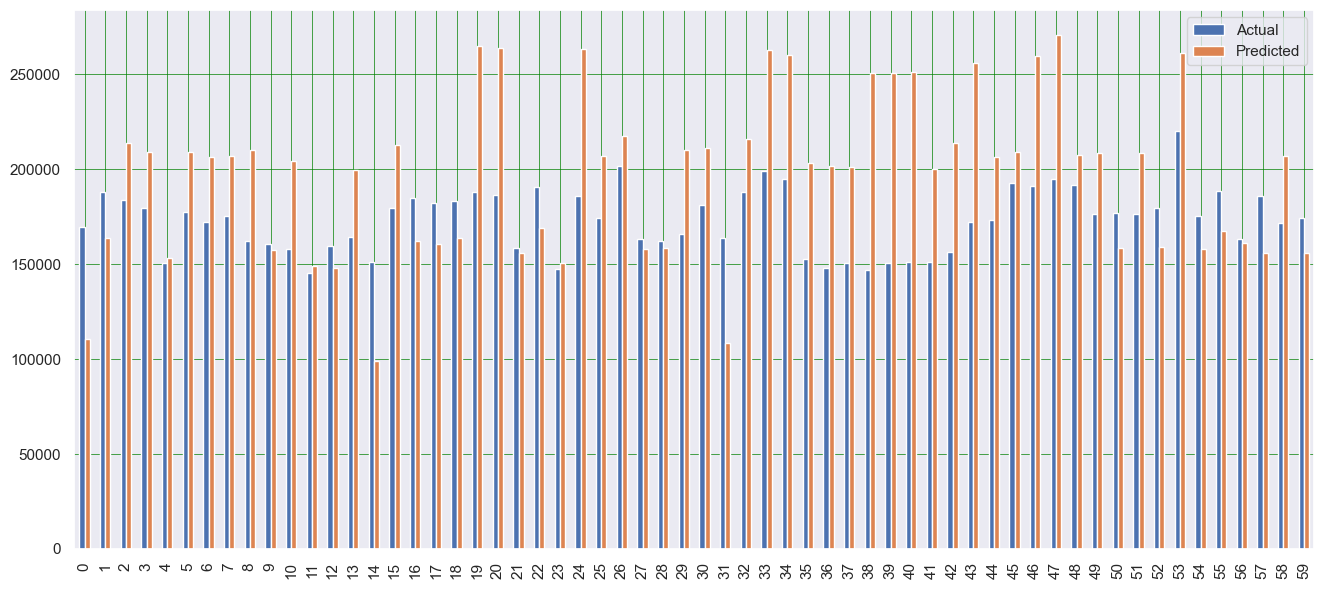

In [2168]:
df1=df.head(60)
df1.plot(kind='bar',figsize=(16,7))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()